In [1]:
from inference import *

PIL imported
boto3 imported
torchvision imported
DEBUG MODE


In [2]:
!cat inference.py

DEBUG = True
from PIL import Image

print('PIL imported')

import numpy as np
import os
import json

try:
    import boto3
except Exception as e:
    print('boto3 failed')
    print('boto3 error', e)
else:
    print('boto3 imported')
    
try:
    import torchvision.transforms as transforms
except Exception as e:
    print('torchvision failed')
    print('torchvision error', e)
else:
    print('torchvision imported')

if DEBUG:
    print('DEBUG MODE')
else:
    print('pwd:', os.getcwd())
    print('ls ', os.listdir())
    print('ls code', os.listdir('code'))
    print('ls inference_model', os.listdir('inference_model'))
    print('ls inference_model/code', os.listdir('inference_model/code'))

import sys
if DEBUG:
    sys.path.append('pytorch-image-models')
else:
    sys.path.append('inference_model/code/pytorch-image-models')

import torch
import timm
import math
from torch import nn
import torch.nn.functional as F 

class CFG:
    img_size = 512
    batch_size = 12
    seed = 2020
   

In [3]:
input_fn('{"bucket": "project-ml-bucket", "key": "bottle_1_a.jpg"}', 'application/json')

input_fn {"bucket": "project-ml-bucket", "key": "bottle_1_a.jpg"}
input_fn application/json
json body {'bucket': 'project-ml-bucket', 'key': 'bottle_1_a.jpg'}
bucket project-ml-bucket key bottle_1_a.jpg
image obtained from s3
image transformed to tensor torch.Size([1, 3, 512, 512])


/home/ec2-user/SageMaker/inference_model/code/boto3/compat.py:88: PythonDeprecationWarning: Boto3 will no longer support Python 3.6 starting May 30, 2022. To continue receiving service updates, bug fixes, and security updates please upgrade to Python 3.7 or later. More information can be found here: https://aws.amazon.com/blogs/developer/python-support-policy-updates-for-aws-sdks-and-tools/
  warnings.warn(warning, PythonDeprecationWarning)


tensor([[[[2.2489, 2.2489, 2.2489,  ..., 2.2489, 2.2489, 2.2489],
          [2.2489, 2.2489, 2.2489,  ..., 2.2489, 2.2489, 2.2489],
          [2.2489, 2.2489, 2.2489,  ..., 2.2489, 2.2489, 2.2489],
          ...,
          [2.2489, 2.2489, 2.2489,  ..., 2.2489, 2.2489, 2.2489],
          [2.2489, 2.2489, 2.2489,  ..., 2.2489, 2.2489, 2.2489],
          [2.2489, 2.2489, 2.2489,  ..., 2.2489, 2.2489, 2.2489]],

         [[2.4286, 2.4286, 2.4286,  ..., 2.4286, 2.4286, 2.4286],
          [2.4286, 2.4286, 2.4286,  ..., 2.4286, 2.4286, 2.4286],
          [2.4286, 2.4286, 2.4286,  ..., 2.4286, 2.4286, 2.4286],
          ...,
          [2.4286, 2.4286, 2.4286,  ..., 2.4286, 2.4286, 2.4286],
          [2.4286, 2.4286, 2.4286,  ..., 2.4286, 2.4286, 2.4286],
          [2.4286, 2.4286, 2.4286,  ..., 2.4286, 2.4286, 2.4286]],

         [[2.6400, 2.6400, 2.6400,  ..., 2.6400, 2.6400, 2.6400],
          [2.6400, 2.6400, 2.6400,  ..., 2.6400, 2.6400, 2.6400],
          [2.6400, 2.6400, 2.6400,  ..., 2

In [3]:
from sagemaker_inference import encoder, decoder
import json

In [14]:
input_data = json.loads("""{
    "image_path": "[s3://my_path/img.jpg]"
    }""")

In [15]:
input_data

{'image_path': '[s3://my_path/img.jpg]'}

In [27]:
encoder.encode({
    'bucket': 'project-ml-bucket',
    'key': 'bottle_1_a.jpg'
 }, 'application/json')

'{"bucket": "project-ml-bucket", "key": "bottle_1_a.jpg"}'

In [52]:
import boto3

s3_client = boto3.client('s3')
img = s3_client.get_object(Bucket='project-ml-bucket', Key='bottle_1_a.jpg')

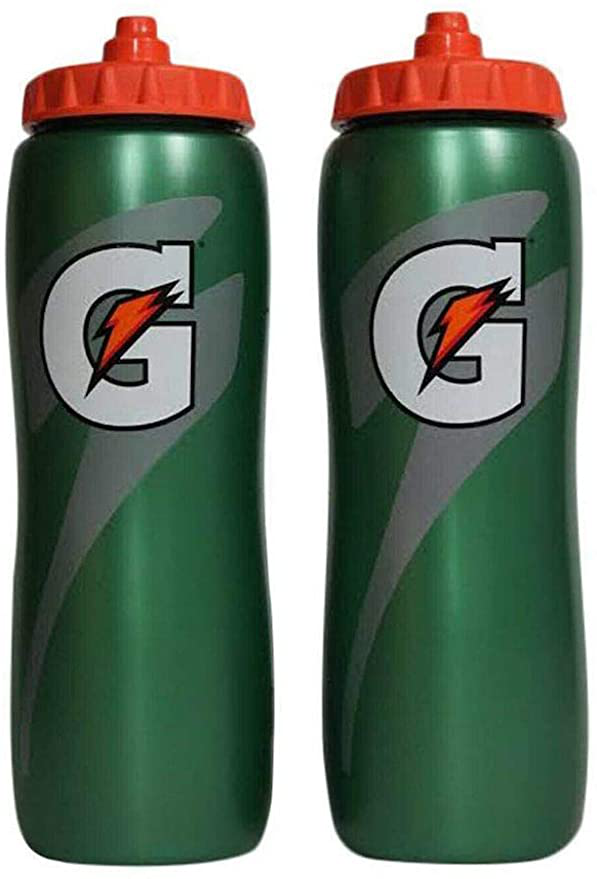

In [53]:
from PIL import Image

img = Image.open(img['Body'])
img

In [54]:
import torchvision.transforms as transforms

In [55]:
transform = transforms.Compose([
    transforms.Resize((512, 512)),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
])

In [57]:
transform(img).mean()

tensor(-0.0321)